Companion notebook for Lecture 23 demonstrating the role of sparsity in linear systems. 

In [53]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Entries of the sparse vector $b^\\dagger$')

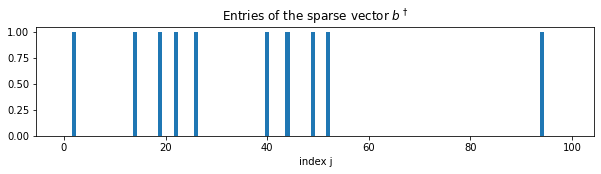

In [60]:
M = 40 # of measurements
N = 100 # of unknowns
s = 10 # sparsity of the unknown vector 

# prescribe the true solution
np.random.seed(seed = 0)

b_dagger = np.zeros(N)
b_dagger[0:10] = 1
b_dagger = np.random.permutation(b_dagger)

fig, ax = plt.subplots(1,1,figsize=(10,2))
ax.bar( np.arange(N), b_dagger )
ax.set_xlabel('index j')
ax.set_title('Entries of the sparse vector $b^\dagger$')

Text(0.5, 1.0, 'Entries of y vector')

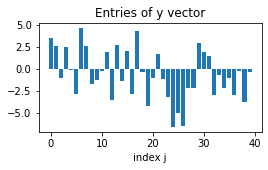

In [61]:
# randomly generate the A matrix 

A = np.random.randn( M, N )

# compute vector b = A*x_dagger

y = np.dot(A, b_dagger)

fig, ax = plt.subplots(1,1,figsize=(10*(M/N),2))
ax.bar( np.arange(M), y )
ax.set_xlabel('index j')
ax.set_title('Entries of y vector')

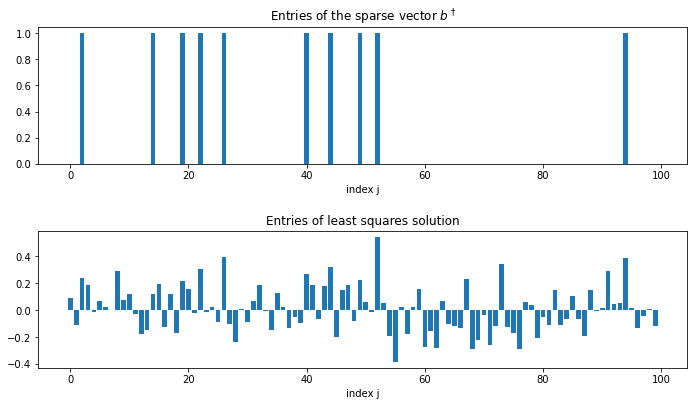

In [63]:
# first we try least squares

b_lsq = np.linalg.lstsq(A, y, rcond=None)[0]

fig, ax = plt.subplots(2,1,figsize=(10,6))

ax[0].bar( np.arange(N), b_dagger )
ax[0].set_xlabel('index j')
ax[0].set_title('Entries of the sparse vector $b^\dagger$')

ax[1].bar( np.arange(N), b_lsq )
ax[1].set_xlabel('index j')
ax[1].set_title('Entries of least squares solution')

fig.tight_layout(pad=2.0)



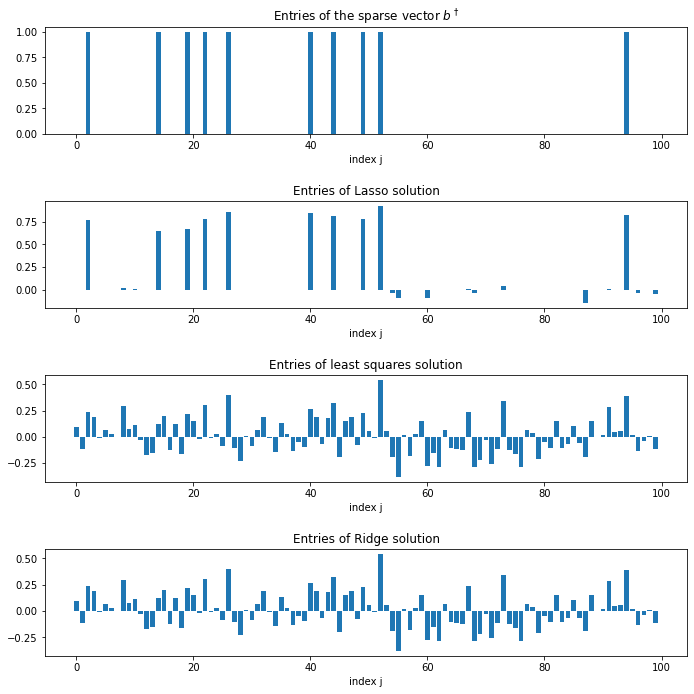

In [65]:
# now try lasso solution 

from sklearn.linear_model import Lasso, Ridge

LR = Lasso(alpha = 0.1, fit_intercept=False)
LR.fit(A, y)

b_lasso = LR.coef_

RR = Ridge(alpha =0.1, fit_intercept=False)
RR.fit(A, y)

b_ridge = RR.coef_

fig, ax = plt.subplots(4,1,figsize=(10,10))

ax[0].bar( np.arange(N), b_dagger )
ax[0].set_xlabel('index j')
ax[0].set_title('Entries of the sparse vector $b^\dagger$')

ax[1].bar( np.arange(N), b_lasso )
ax[1].set_xlabel('index j')
ax[1].set_title('Entries of Lasso solution')

ax[2].bar( np.arange(N), b_lsq )
ax[2].set_xlabel('index j')
ax[2].set_title('Entries of least squares solution')

ax[3].bar( np.arange(N), b_ridge )
ax[3].set_xlabel('index j')
ax[3].set_title('Entries of Ridge solution')

fig.tight_layout(pad=2.0)
